In [1]:
import psycopg2
import pandas as pd


# Define your database connection parameters
db_params = {
    'host': '',
    'port': '6379',
    'dbname': '',  # Use 'dbname' instead of 'database' for psycopg2
    'user': 'group12',
    'password': ''}

In [2]:
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

# Define your SQL query to select the head of the table
query = 'SELECT * FROM data_lake.accident_data_17_23 LIMIT 5'

# Execute the query
cursor.execute(query)

# Fetch the result
result = cursor.fetchall()

# Get column names
colnames = [desc[0] for desc in cursor.description]

# Close the cursor and connection
cursor.close()
conn.close()

# Create a DataFrame from the result
df = pd.DataFrame(result, columns=colnames)
df


,Year,Accident severity,municipality,town,First Mode of Transport,Second mode of Transport,Area Type,Light condition,Road Location,Road condition,Road surface,Road situation,Speed limit,street,weather,accidents
0,2017,Fatal,Breda,BREDA,Car,Pedestrian,Urban area,Darkness,Intersection,Wet/damp,Brick,Bend,30 km/h,Valkeniersplein,Rain,1
1,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Intersection,Wet/damp,Brick,Intersection - 4 arms,50 km/h,Markendaalseweg,Dry,1
2,2017,Fatal,Breda,BREDA,Lorry,Other,Urban area,Daylight,Road section,Dry,Asphalt (other),Straight road,50 km/h,Academiesingel,Dry,1
3,2017,Injured,Breda,BAVEL,Car,Lorry,Rural area,Darkness,Road section,Wet/damp,Asphalt (other),Bend,120 km/h,KP ST.ANNABOSCH,Dry,1
4,2017,Injured,Breda,BAVEL,Car,Other,Rural area,Darkness,Road section,Wet/damp,Porous asphalt,Straight road,130 km/h,RYKSWG,Rain,1


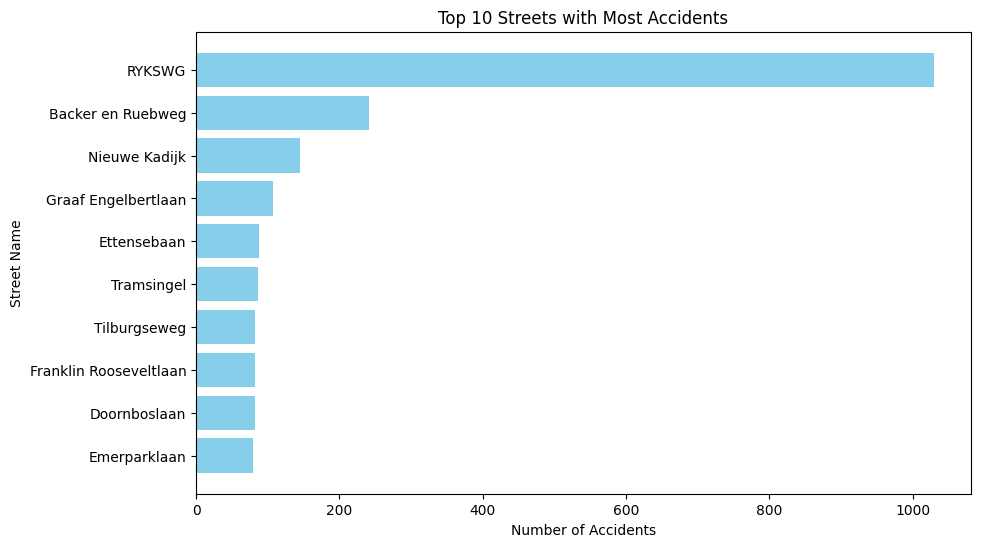

In [3]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


# Connect to the database
conn = psycopg2.connect(**db_params)
cursor = conn.cursor()

# Define your SQL query to get the street names and count of accidents
query = '''
    SELECT street, COUNT(*) as accident_count
    FROM data_lake.accident_data_17_23
    GROUP BY street
    ORDER BY accident_count DESC
    LIMIT 10
'''

# Execute the query
cursor.execute(query)

# Fetch the result
result = cursor.fetchall()

# Get column names
colnames = [desc[0] for desc in cursor.description]

# Close the cursor and connection
cursor.close()
conn.close()

# Create a DataFrame from the result
df = pd.DataFrame(result, columns=colnames)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(df['street'], df['accident_count'], color='skyblue')
plt.xlabel('Number of Accidents')
plt.ylabel('Street Name')
plt.title('Top 10 Streets with Most Accidents')
plt.gca().invert_yaxis()
plt.show()
